In [483]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [485]:
data=pd.read_csv('/content/drive/MyDrive/MLData/Iris.csv')

In [486]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [487]:
#deleting id column
data=data.drop(columns=['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [488]:
data = data.rename(columns={'SepalLengthCm':'Sepal_length','SepalWidthCm':'Sepal_width','PetalLengthCm':'Petal_length','PetalWidthCm':'Petal_width'})

data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [489]:
#statistics
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [490]:
#basic informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Sepal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [491]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [492]:
data.isnull().sum()

Sepal_length    0
Sepal_width     0
Petal_length    0
Petal_width     0
Species         0
dtype: int64

<Axes: >

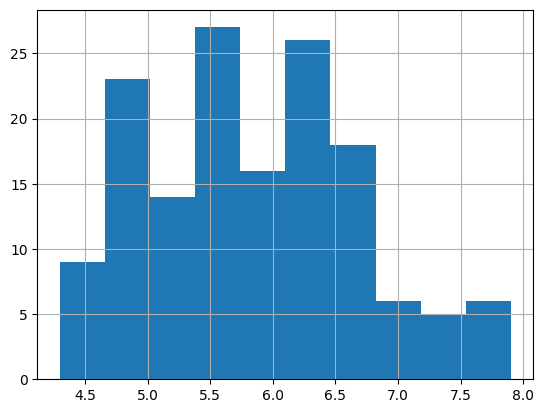

In [493]:
#histograms
data['Sepal_length'].hist()


<Axes: >

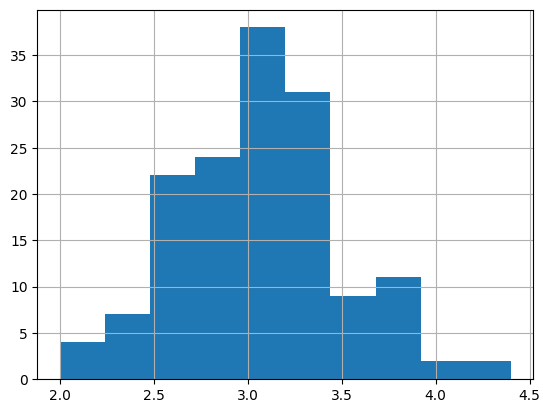

In [494]:
data['Sepal_width'].hist()

<Axes: >

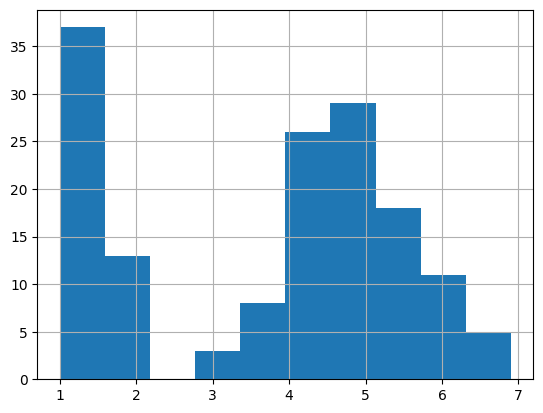

In [495]:
data['Petal_length'].hist()

<Axes: >

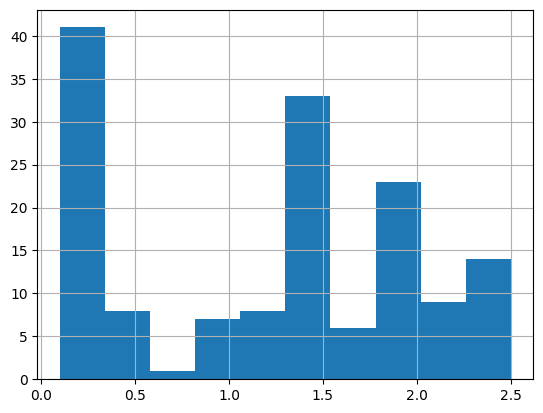

In [496]:
data['Petal_width'].hist()

In [497]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

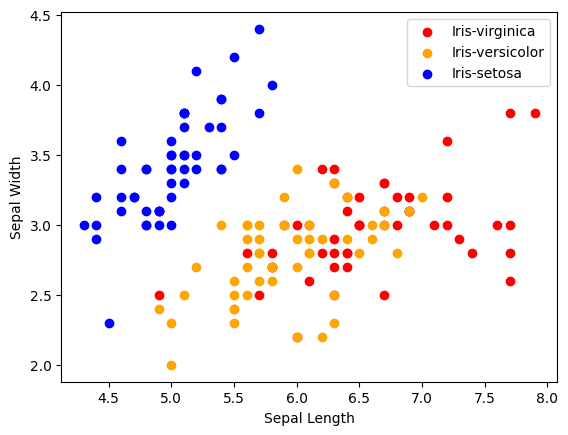

In [498]:
for i in range(3):
  x=data[data['Species']==species[i]]
  plt.scatter(x['Sepal_length'],x['Sepal_width'],c = colors[i], label=species[i])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

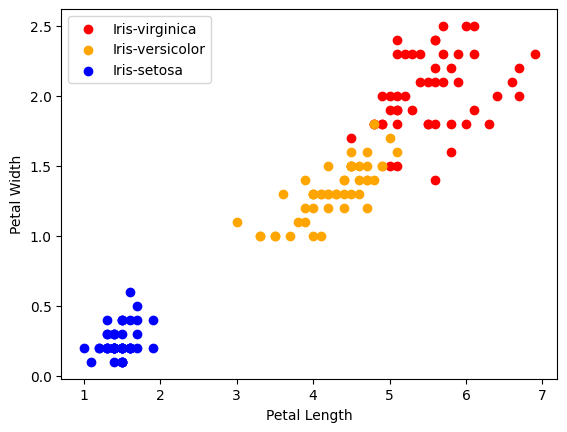

In [499]:
for i in range(3):
  x=data[data['Species']==species[i]]
  plt.scatter(x['Petal_length'],x['Petal_width'],c = colors[i], label=species[i])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

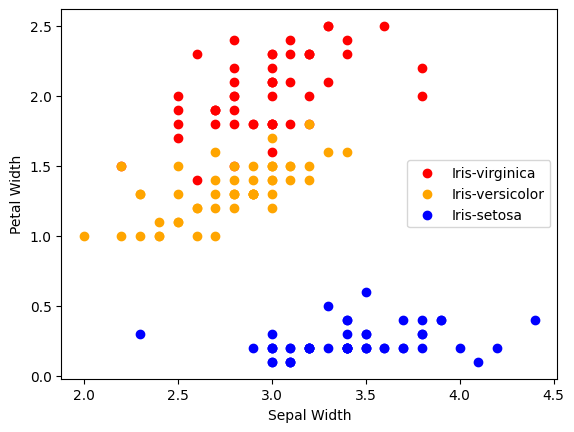

In [500]:
for i in range(3):
  x=data[data['Species']==species[i]]
  plt.scatter(x['Sepal_width'],x['Petal_width'],c = colors[i], label=species[i])

plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [501]:
#Coorelation Matrix

In [502]:
data.corr()

<ipython-input-502-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.109369,0.871754,0.817954
Sepal_width,-0.109369,1.000000,-0.420516,-0.356544
Petal_length,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-503-e4a4183b2c7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

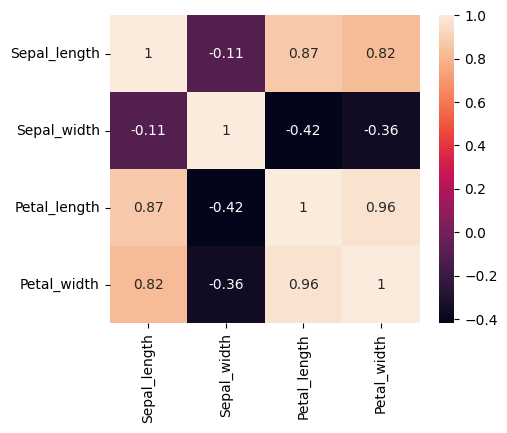

In [503]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

In [504]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [505]:
data['Species']=le.fit_transform(data['Species'])
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [506]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['Species'])
Y=data['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=2)

In [507]:
x_train.shape

(105, 4)

In [508]:
x_test.shape

(45, 4)

#Implementing Logistic Regreesion Classifier

In [509]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [510]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [511]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 1, 2, 1,
       0])

In [512]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [513]:
# Model Evaluation
Log_Regg_ac_sc = accuracy_score(y_test, y_pred)
Log_Regg_rc_sc = recall_score(y_test, y_pred, average="weighted")
Log_Regg_pr_sc = precision_score(y_pred, y_test, average="weighted")
Log_Regg_f1_sc = f1_score(y_test, y_pred, average='micro')
confusion_m = confusion_matrix(y_test, y_pred)

print("========== Logistic Regression Results ==========")
print("Accuracy    : ", Log_Regg_ac_sc)
print("Recall      : ", Log_Regg_rc_sc)
print("Precision   : ", Log_Regg_pr_sc)
print("F1 Score    : ", Log_Regg_f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Logistic Regression Results ==========
Accuracy    :  0.9777777777777777
Recall      :  0.9777777777777777
Precision   :  0.9792592592592592
F1 Score    :  0.9777777777777777
Confusion Matrix: 
[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


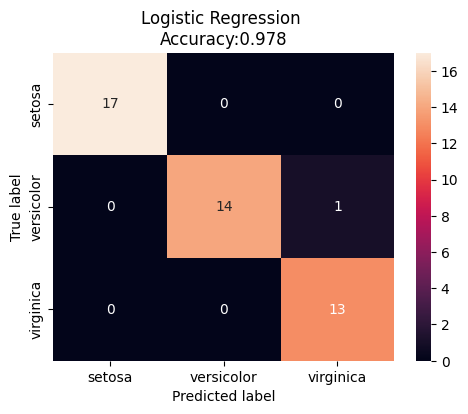

In [514]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(confusion_m,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Implementing SVM Model

In [515]:
from sklearn.svm import SVC
svm_model=SVC(kernel='linear').fit(x_train,y_train)
y_pred=svm_model.predict(x_test)

In [516]:
# Model Evaluation
SVM_ac_sc = accuracy_score(y_test, y_pred)
SVM_rc_sc = recall_score(y_test, y_pred, average="weighted")
SVM_pr_sc = precision_score(y_pred, y_test, average="weighted")
SVM_f1_sc = f1_score(y_test, y_pred, average='micro')
confusion_m = confusion_matrix(y_test, y_pred)

print("========== SVM Classification Results ==========")
print("Accuracy    : ", SVM_ac_sc)
print("Recall      : ", SVM_rc_sc)
print("Precision   : ", SVM_pr_sc)
print("F1 Score    : ", SVM_f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== SVM Classification Results ==========
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


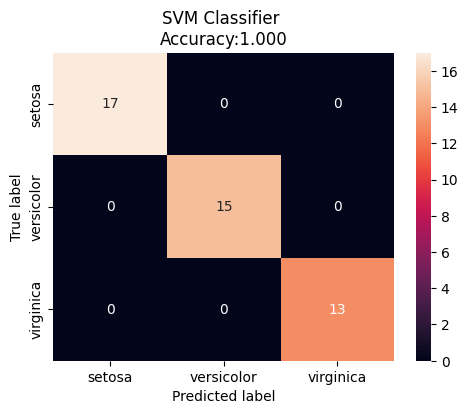

In [517]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(confusion_m,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Implementing KNN classifier

In [518]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [519]:
# Model Evaluation
KNN_ac_sc = accuracy_score(y_test, y_pred)
KNN_rc_sc = recall_score(y_test, y_pred, average="weighted")
KNN_pr_sc = precision_score(y_pred, y_test, average="weighted")
KNN_f1_sc = f1_score(y_test, y_pred, average='micro')
confusion_m = confusion_matrix(y_test, y_pred)

print("========== KNN Classification Results ==========")
print("Accuracy    : ", KNN_ac_sc)
print("Recall      : ", KNN_rc_sc)
print("Precision   : ", KNN_pr_sc)
print("F1 Score    : ", KNN_f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== KNN Classification Results ==========
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


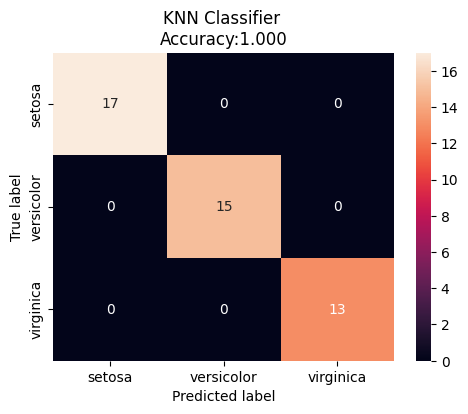

In [520]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(confusion_m,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('KNN Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Implementing Naive bayes Classifier

In [521]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)

In [522]:
# Model Evaluation
Naive_bayes_ac_sc = accuracy_score(y_test, y_pred)
Naive_bayes_rc_sc = recall_score(y_test, y_pred, average="weighted")
Naive_bayes_pr_sc = precision_score(y_pred, y_test, average="weighted")
Naive_bayes_f1_sc = f1_score(y_test, y_pred, average='micro')
confusion_m = confusion_matrix(y_test, y_pred)

print("========== Naive bayes Classification Results ==========")
print("Accuracy    : ", Naive_bayes_ac_sc)
print("Recall      : ", Naive_bayes_rc_sc)
print("Precision   : ",Naive_bayes_pr_sc)
print("F1 Score    : ", Naive_bayes_f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Naive bayes Classification Results ==========
Accuracy    :  0.9777777777777777
Recall      :  0.9777777777777777
Precision   :  0.9792592592592592
F1 Score    :  0.9777777777777777
Confusion Matrix: 
[[17  0  0]
 [ 0 14  1]
 [ 0  0 13]]


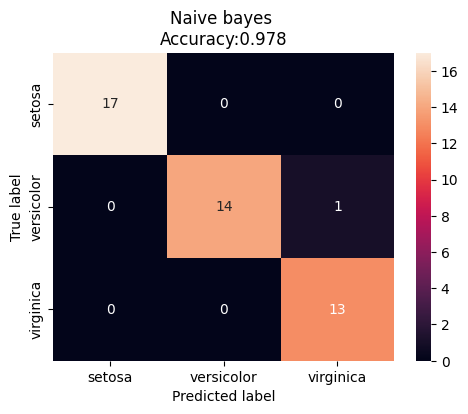

In [523]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(confusion_m,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Naive bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Implementing Decision Tree

In [524]:
from sklearn.tree import DecisionTreeClassifier

In [525]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)

In [526]:
# Model Evaluation
Decision_Tree_ac_sc = accuracy_score(y_test, y_pred)
Decision_Tree_rc_sc = recall_score(y_test, y_pred, average="weighted")
Decision_pr_sc = precision_score(y_pred, y_test, average="weighted")
Decision_f1_sc = f1_score(y_test, y_pred, average='micro')
confusion_m = confusion_matrix(y_test, y_pred)

print("========== Decision Tree Classification Results ==========")
print("Accuracy    : ", Decision_Tree_ac_sc)
print("Recall      : ", Decision_Tree_rc_sc)
print("Precision   : ", Decision_pr_sc)
print("F1 Score    : ", Decision_f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Decision Tree Classification Results ==========
Accuracy    :  0.9555555555555556
Recall      :  0.9555555555555556
Precision   :  0.9555555555555556
F1 Score    :  0.9555555555555556
Confusion Matrix: 
[[17  0  0]
 [ 0 14  1]
 [ 0  1 12]]


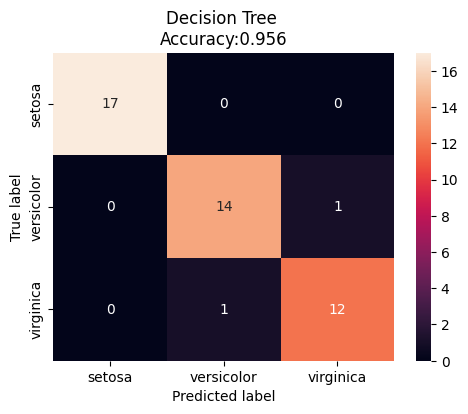

In [527]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(confusion_m,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Comparision of Performance

In [528]:
results = pd.DataFrame({'Model': [ 'KNN', 'Logistic Regression', 'Naive Bayes',' Support Vector Machine','Decision Tree'],
                        'Recall Score': [ KNN_rc_sc,Log_Regg_rc_sc,Naive_bayes_rc_sc,SVM_rc_sc,Decision_Tree_rc_sc],
                        'Accuracy_score': [KNN_ac_sc,Log_Regg_ac_sc,Naive_bayes_ac_sc,SVM_ac_sc,Decision_Tree_ac_sc],
                        'Precision': [KNN_pr_sc, Log_Regg_pr_sc,Naive_bayes_pr_sc,SVM_pr_sc,Decision_pr_sc],
                        "F1 Score": [KNN_f1_sc,Log_Regg_f1_sc, Naive_bayes_f1_sc, SVM_f1_sc,Decision_f1_sc]})
print(results)

                     Model  Recall Score  Accuracy_score  Precision  F1 Score
0                      KNN      1.000000        1.000000   1.000000  1.000000
1      Logistic Regression      0.977778        0.977778   0.979259  0.977778
2              Naive Bayes      0.977778        0.977778   0.979259  0.977778
3   Support Vector Machine      1.000000        1.000000   1.000000  1.000000
4            Decision Tree      0.955556        0.955556   0.955556  0.955556
